## Import

In [117]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sns
# Pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import decomposition
from sklearn import decomposition, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [118]:
from Hackaton.python.read_pics import get_pics_from_file

In [119]:
pics_name = os.listdir('Hackaton/data/')
pics_name.remove('pics_LOGINMDP.bin')


## Transform to panda dataset


In [120]:
data = dict()
for i in range(17):
    data[str(i)] = []
data["name"] = []

for pic_name in pics_name:
    pics_key, info = get_pics_from_file(f'Hackaton/data/{pic_name}')
    for pics in pics_key:
        for i, pic in enumerate(pics):
            data[str(i)].append(pic)
        data["name"].append(pics_name.index(pic_name))

df = pd.DataFrame(data)
df.head(6)

df = df.sample(frac=1)
df.head(6)

Ouverture du fichier de pics Hackaton/data/pics_0.bin
Ouverture du fichier de pics Hackaton/data/pics_1.bin
Ouverture du fichier de pics Hackaton/data/pics_2.bin
Ouverture du fichier de pics Hackaton/data/pics_3.bin
Ouverture du fichier de pics Hackaton/data/pics_4.bin
Ouverture du fichier de pics Hackaton/data/pics_5.bin
Ouverture du fichier de pics Hackaton/data/pics_6.bin
Ouverture du fichier de pics Hackaton/data/pics_7.bin
Ouverture du fichier de pics Hackaton/data/pics_8.bin
Ouverture du fichier de pics Hackaton/data/pics_9.bin
Ouverture du fichier de pics Hackaton/data/pics_A.bin
Ouverture du fichier de pics Hackaton/data/pics_B.bin
Ouverture du fichier de pics Hackaton/data/pics_C.bin
Ouverture du fichier de pics Hackaton/data/pics_CTRL.bin
Ouverture du fichier de pics Hackaton/data/pics_D.bin
Ouverture du fichier de pics Hackaton/data/pics_E.bin
Ouverture du fichier de pics Hackaton/data/pics_ENTER.bin
Ouverture du fichier de pics Hackaton/data/pics_F.bin
Ouverture du fichier 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,name
169288,0.697632,0.275269,0.089722,0.978394,0.700073,0.539551,0.653076,0.729370,0.736084,0.244751,1.358643,0.625000,0.481567,0.652466,0.824585,0.608521,0.307617,19
311958,0.430908,0.453491,0.259399,0.825806,0.627441,0.576172,0.783081,2.028809,0.722656,0.325317,0.478516,0.643311,0.373535,0.517578,0.627441,0.901489,0.501709,37
329483,0.535889,0.260620,0.106201,0.695190,0.691528,0.720215,1.452026,0.505981,0.655518,0.325928,0.625610,0.209961,0.350342,0.849609,0.795288,0.733643,0.230103,39
165976,0.805664,0.506592,0.344849,0.487061,0.445557,0.686035,0.557251,0.579224,0.784302,0.546265,1.629028,0.760498,0.418701,0.737305,0.543823,0.829468,0.566406,19
311807,0.725708,0.588379,0.139160,0.828247,1.012573,0.786133,0.800781,1.726685,0.672607,0.416260,0.682983,0.570679,0.216675,0.483398,0.917969,0.769653,0.257568,37
170854,0.668335,0.470581,0.255127,0.666504,0.632935,0.718384,0.986938,0.541992,0.375366,0.379639,0.653076,2.012329,0.117798,0.307617,0.822754,1.072388,0.370483,20


In [121]:
X = df.iloc[:, :-1]
y = df.iloc[:, 17]

print("X shape = " + str(X.shape))
print("y shape = " + str(y.shape))


X shape = (351612, 17)
y shape = (351612,)


In [122]:
# Normalize
normalizer = Normalizer()
X = normalizer.fit_transform(X)

# Standardize
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [123]:
# Matplotlib
import matplotlib.pyplot as plt
# Tensorflow
import tensorflow as tf
# Numpy and Pandas
import numpy as np
import pandas as pd
# Ohter import
import sys

## Be sure to used Tensorflow 2.0

In [124]:
assert hasattr(tf, "function") # Be sure to use tensorflow 2.0

In [125]:
# Flatten
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[17, 1]))

# Add the layers
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(42, activation="softmax"))

model_output = model.predict(X[0:1])
print(model_output, y[0:1])

[[0.02536625 0.02473514 0.02335995 0.02614468 0.02035746 0.01969067
  0.02605994 0.02713262 0.02522066 0.02769893 0.02119401 0.02035014
  0.02889023 0.02478554 0.0206635  0.02163037 0.02041464 0.0258054
  0.02970881 0.02987924 0.02335768 0.01839557 0.01815789 0.02747452
  0.03153114 0.02287679 0.01737007 0.02682839 0.0222497  0.01883497
  0.01783657 0.02929063 0.02542166 0.02856474 0.02558175 0.02295504
  0.02058929 0.02495357 0.02617615 0.01897537 0.02350676 0.01998341]] 169288    19
Name: name, dtype: int64


## Model Summary

In [126]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_13 (Flatten)         (None, 17)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 256)               4608      
_________________________________________________________________
dense_22 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_23 (Dense)             (None, 42)                5418      
Total params: 42,922
Trainable params: 42,922
Non-trainable params: 0
_________________________________________________________________


## Compile the model

In [127]:
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

## Train the model

In [128]:
history = model.fit(X, y, epochs=10)

Epoch 1/10
10988/10988 [==============================] - 20s 2ms/step - loss: 2.0434 - accuracy: 0.3607    

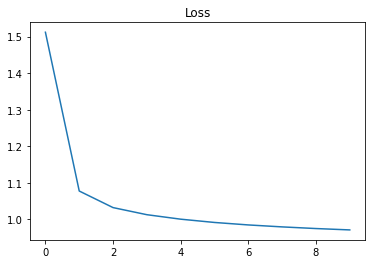

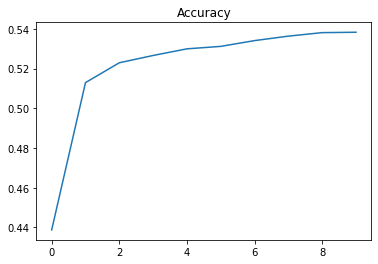

In [129]:
loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]

plt.plot(loss_curve)
plt.title("Loss")
plt.show()

plt.plot(acc_curve)
plt.title("Accuracy")
plt.show()